In [59]:
import importlib

import settings
import VPINN_tri_final
import mesh_lib

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights
import os 

importlib.reload(settings)
importlib.reload(mesh_lib)
importlib.reload(VPINN_tri_final)

from settings import *
from mesh_lib import *
from VPINN_tri_final import *
#tf.config.run_functions_eagerly(True)


os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

settings_lib imported 
mesh_lib imported


degree =  1  , local dof =  3  internal dof =  0  points inside each edge =  0
[[0 0]
 [1 0]
 [0 1]]


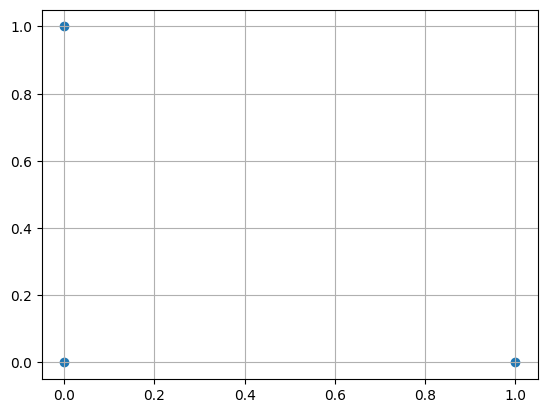

In [60]:
basis=interpolator(1,False,False,points=None)

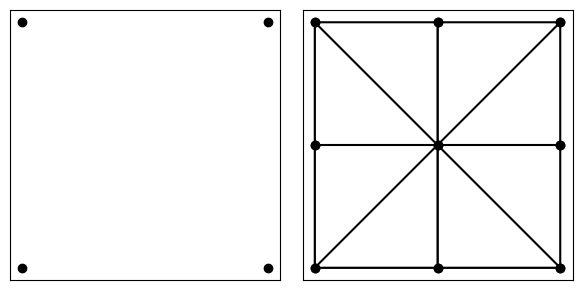

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr

# Step 1: Generate a fine mesh
A = dict(vertices=np.array(((0, 0), (1, 0), (1, 1), (0, 1))))
B = tr.triangulate(A, 'qnea0.2')
tr.compare(plt,A,B)

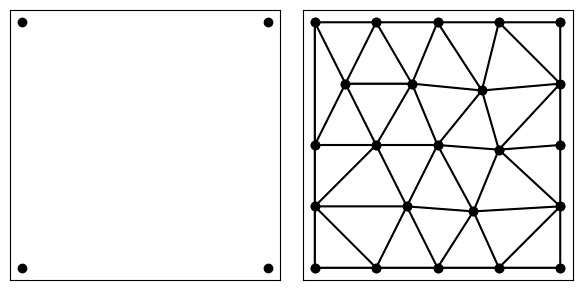

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr



# Step 1: Generate a fine mesh
A = dict(vertices=np.array(((0, 0), (1, 0), (1, 1), (0, 1))))
B = tr.triangulate(A,'qnea0.05')

tr.compare(plt, A, B)

[[17 21]
 [16 21]
 [16 17]
 [ 7 11]
 [ 5  7]
 [ 5 11]
 [ 3 10]
 [ 3  9]
 [ 9 10]
 [ 3  5]
 [ 5  9]
 [ 4 19]
 [18 19]
 [ 4 18]
 [12 19]
 [ 6 12]
 [ 6 19]
 [11 12]
 [ 7 12]
 [ 7 14]
 [ 9 14]
 [ 7  9]
 [11 13]
 [ 0 11]
 [ 0 13]
 [ 4  7]
 [ 4 14]
 [ 8 14]
 [14 17]
 [ 8 17]
 [12 13]
 [ 6 13]
 [10 14]
 [ 4 12]
 [15 21]
 [18 21]
 [15 18]
 [ 8 10]
 [17 18]
 [ 4 17]
 [ 8 16]
 [ 2 21]
 [ 2 16]
 [19 22]
 [18 22]
 [ 1 22]
 [20 22]
 [ 1 20]
 [15 22]
 [ 6 20]
 [19 20]]


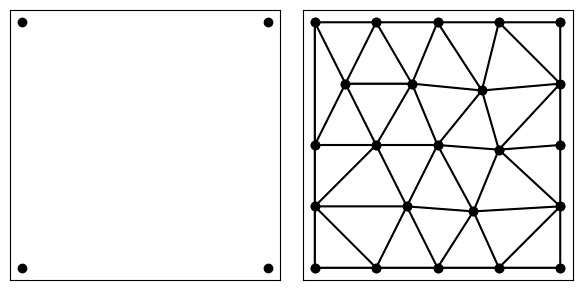

In [63]:

#edges flipping 

for i in range(len(B['edges'])):
    ii=B['edges'][i][0]
    jj=B['edges'][i][1]

    if ii>jj:
            B['edges'][i][0],B['edges'][i][1]=B['edges'][i][1],B['edges'][i][0]

tr.compare(plt, A, B)

print(B['edges'])

In [64]:

#util functions

def get_triangle_edges(triangle_vertices,edges):
    triangle_edges = []
 

    keep=np.zeros((3,),dtype=np.int64)

    for i in range(3):
        ii=triangle_vertices[i].copy()
        jj=triangle_vertices[(i + 1) % 3].copy()
        

        if(ii>jj):
            edge=np.array([jj,ii])
        else:
            edge=np.array([ii,jj])

        index= np.where(np.all(edges == edge, axis=1))[0][0]
        
        triangle_edges.append(index)

        if ii>jj:
            keep[i]=1

    triangle_edges=np.array(triangle_edges)
        
    return keep,triangle_edges

In [65]:
#flipping part + edges
l=[]
temp=[]
for triangle in B['triangles']:
    keep,t=get_triangle_edges(triangle,B['edges'])
    l.append(keep)
    temp.append(t)



keep=np.asarray(l)
edges_index_inside_triangle=np.asarray(temp)

In [66]:
B['keep']=keep
B['edges_index_inside_triangle']=edges_index_inside_triangle

In [67]:
B.keys()

dict_keys(['vertices', 'vertex_markers', 'triangles', 'neighbors', 'edges', 'edge_markers', 'keep', 'edges_index_inside_triangle'])

In [68]:
print(B['edges_index_inside_triangle'][0][0])

0


In [69]:
#exp
n_vertices=len(B['vertices'])
n_traingles=len(B['triangles'])
n_edges=len(B['edges'])

n_inside_edge=basis.n_inside_edge
n_inside=basis.n_inside

vertices_contribution=np.zeros((n_vertices,1))
edges_contribution=np.zeros((n_edges,n_inside_edge))
inside_contribution=np.zeros((n_traingles,n_inside))




for index,triangle in enumerate(B['triangles']):


    if (B['vertex_markers'][triangle[0]]==0):
            vertices_contribution[triangle[0]]=1
    else:
          vertices_contribution[triangle[0]]=2

    if (B['vertex_markers'][triangle[1]]==0):
            vertices_contribution[triangle[1]]=1
    else:
          vertices_contribution[triangle[1]]=2    

    if (B['vertex_markers'][triangle[2]]==0):
            vertices_contribution[triangle[2]]=1
    else:
          vertices_contribution[triangle[2]]=2
    

    if(B['edge_markers'][B['edges_index_inside_triangle'][index][0]]==0):
           
           edges_contribution[B['edges_index_inside_triangle'][index][0]]+=3

    if(B['edge_markers'][B['edges_index_inside_triangle'][index][1]]==0):
           edges_contribution[B['edges_index_inside_triangle'][index][1]]+=3

    if(B['edge_markers'][B['edges_index_inside_triangle'][index][2]]==0):
           edges_contribution[B['edges_index_inside_triangle'][index][2]]+=3      



print(B['edges'])
print(edges_contribution)


    
                                   

[[17 21]
 [16 21]
 [16 17]
 [ 7 11]
 [ 5  7]
 [ 5 11]
 [ 3 10]
 [ 3  9]
 [ 9 10]
 [ 3  5]
 [ 5  9]
 [ 4 19]
 [18 19]
 [ 4 18]
 [12 19]
 [ 6 12]
 [ 6 19]
 [11 12]
 [ 7 12]
 [ 7 14]
 [ 9 14]
 [ 7  9]
 [11 13]
 [ 0 11]
 [ 0 13]
 [ 4  7]
 [ 4 14]
 [ 8 14]
 [14 17]
 [ 8 17]
 [12 13]
 [ 6 13]
 [10 14]
 [ 4 12]
 [15 21]
 [18 21]
 [15 18]
 [ 8 10]
 [17 18]
 [ 4 17]
 [ 8 16]
 [ 2 21]
 [ 2 16]
 [19 22]
 [18 22]
 [ 1 22]
 [20 22]
 [ 1 20]
 [15 22]
 [ 6 20]
 [19 20]]
[]


In [70]:
tfk=tf.keras
tfkl=tf.keras.layers

In [71]:
model = tfk.models.Sequential()
model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer="glorot_uniform",dtype=tf.float64,bias_initializer="glorot_uniform"))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer="glorot_uniform",dtype=tf.float64,bias_initializer="glorot_uniform"))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer="glorot_uniform",dtype=tf.float64,bias_initializer="glorot_uniform"))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer="glorot_uniform",dtype=tf.float64,bias_initializer="glorot_uniform"))
model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer="glorot_uniform",dtype=tf.float64,use_bias=True))

In [72]:
print(model.summary())
print(model.input_shape)
print(model.output_shape)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30        
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________
None
(None, 2)
(None, 1)


In [73]:
print()

In [74]:
print(model.trainable_variables)

[<tf.Variable 'dense_10/kernel:0' shape=(2, 10) dtype=float64, numpy=
array([[-0.69970564, -0.57084113,  0.62171715, -0.27677658,  0.43025129,
         0.08549969, -0.31877423,  0.61360831, -0.03287048,  0.42898694],
       [ 0.49798565, -0.09241662, -0.14701134,  0.61911114, -0.3386129 ,
        -0.20950671, -0.40509391,  0.21404754,  0.46214805,  0.57780235]])>, <tf.Variable 'dense_10/bias:0' shape=(10,) dtype=float64, numpy=
array([-0.25481813,  0.42438193,  0.30457101, -0.18406811,  0.2177514 ,
       -0.26833625,  0.36364596, -0.11629403, -0.31135244,  0.24461068])>, <tf.Variable 'dense_11/kernel:0' shape=(10, 10) dtype=float64, numpy=
array([[ 3.93995627e-01, -2.78508773e-01,  2.76656538e-01,
        -2.16798349e-02, -5.99760482e-02,  3.74167293e-01,
         2.97434566e-01,  2.56064601e-01, -2.24991466e-01,
         1.03461497e-01],
       [ 5.07782999e-01,  4.74725682e-02,  6.18266974e-02,
         5.74065965e-02, -4.79562975e-01, -2.80392221e-01,
         5.20387004e-01, -3.49

In [75]:
from settings import *
N_tests = 2
N_elements = [5, 5]
params = {'scheme': 'VPINNs',
            'NN_struct': [2] + [5] * 3 + [1],
            'var_form': 1,
            'n_elements': tuple(N_elements),
            'n_test': [N_elements[0]*[N_tests], N_elements[1]*[N_tests]],
            'n_quad': 50,
            'n_bound': 80, # for every edge 
            'n_residual': 100,
            'domain': ((0.0, 1.0), (0.0, 1.0)),
            'Opt_Niter': 15000 + 1,
            'delta_test': 0.01,
            'N_test':N_tests}





44
degree =  2  , local dof =  6  internal dof =  0  points inside each edge =  1
[[0 0]
 [1 0]
 [0 1]
 [1/2 0]
 [1/2 1/2]
 [0 1/2]]


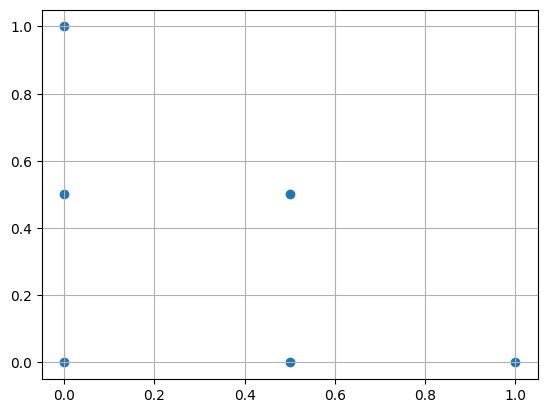

degree =  2  , local dof =  6  internal dof =  0  points inside each edge =  1
[[0 0]
 [1 0]
 [0 1]
 [1/2 0]
 [1/2 1/2]
 [0 1/2]]


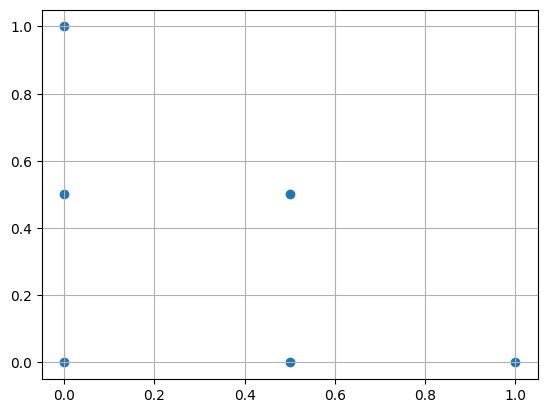

In [76]:
vp=VPINN(pb,params,B,model)

In [77]:
tf.reduce_mean(tf.square(model(vp.boundary_points) - vp.u_bound_exact))

<tf.Tensor: shape=(), dtype=float64, numpy=0.3956311365449399>

In [78]:
_,c,J,B_D,B_DD=vp.b.change_of_coordinates(vp.mesh['vertices'][vp.mesh['triangles'][0]])

t=np.array(vp.grad_test)[0]

print((B_D@t))
print()
xy_quad_element=(B_D@ vp.grad_test)


print(xy_quad_element)

[[-7.23126682 -4.87456357 -1.58469132  1.38238232 -4.39954381 -2.70276445
  -0.33412201  1.80211187 -0.70493607  0.13082691  1.2975217   2.3497417
   2.12678694  2.30262603  2.54809101  2.76947125]
 [-7.23126682 -4.87456357 -1.58469132  1.38238232 -4.39954381 -2.70276445
  -0.33412201  1.80211187 -0.70493607  0.13082691  1.2975217   2.3497417
   2.12678694  2.30262603  2.54809101  2.76947125]]

tf.Tensor(
[[[ -7.23126682  -4.87456357  -1.58469132   1.38238232  -4.39954381
    -2.70276445  -0.33412201   1.80211187  -0.70493607   0.13082691
     1.2975217    2.3497417    2.12678694   2.30262603   2.54809101
     2.76947125]
  [ -7.23126682  -4.87456357  -1.58469132   1.38238232  -4.39954381
    -2.70276445  -0.33412201   1.80211187  -0.70493607   0.13082691
     1.2975217    2.3497417    2.12678694   2.30262603   2.54809101
     2.76947125]]

 [[ -2.47159262   0.34394213   4.27432652   7.81906597  -2.47159262
     0.34394213   4.27432652   7.81906597  -2.47159262   0.34394213
     4.2743

In [79]:
print(vp.xy_quad_total)

tf.Tensor(
[[[0.70362046 0.74185524]
  [0.77269075 0.74375335]
  [0.86911038 0.74640304]
  [0.95606941 0.74879275]
  [0.72060523 0.81014334]
  [0.78571728 0.79612713]
  [0.87661134 0.77656101]
  [0.95858697 0.75891469]
  [0.74276562 0.89924024]
  [0.80271326 0.86446029]
  [0.88639799 0.81590873]
  [0.96187167 0.772121  ]
  [0.7597504  0.96752834]
  [0.81573979 0.91683407]
  [0.89389895 0.84606669]
  [0.96438922 0.78224294]]

 [[0.01427605 0.2806428 ]
  [0.06921075 0.33176328]
  [0.14589761 0.40312563]
  [0.21506003 0.46748598]
  [0.01427605 0.34206719]
  [0.06921075 0.37887292]
  [0.14589761 0.43025238]
  [0.21506003 0.47659055]
  [0.01427605 0.42220886]
  [0.06921075 0.44033784]
  [0.14589761 0.46564522]
  [0.21506003 0.48846948]
  [0.01427605 0.48363325]
  [0.06921075 0.48744747]
  [0.14589761 0.49277198]
  [0.21506003 0.49757405]]

 [[0.22754058 0.98363325]
  [0.17451298 0.98744747]
  [0.10048838 0.99277198]
  [0.03372699 0.99757405]
  [0.19682838 0.92220886]
  [0.15095816 0.9403378

In [80]:
n_triangles=vp.n_triangles
xy_quad_total =vp.xy_quad_total

print(n_triangles)


x_eval=tf.reshape(vp.xy_quad_total,(-1,2))
grad=vp.eval_grad_NN(x_eval)

print(grad)

grad=tf.reshape(grad,(n_triangles,-1,2))

print(tf.shape(grad))

29
tf.Tensor(
[[0.5196589  0.19767703]
 [0.50486368 0.18700533]
 [0.4806123  0.17241149]
 [0.4565797  0.15981415]
 [0.50576413 0.18731401]
 [0.49390772 0.17877103]
 [0.47426084 0.16754612]
 [0.45448635 0.1581759 ]
 [0.48694271 0.17400986]
 [0.47937967 0.16826115]
 [0.46596933 0.1613143 ]
 [0.45176096 0.15605436]
 [0.47221394 0.16399116]
 [0.46815331 0.16038305]
 [0.45962348 0.15662462]
 [0.44967691 0.15444035]
 [0.38315907 0.24596524]
 [0.42014252 0.25334837]
 [0.46659957 0.2602505 ]
 [0.5009747  0.26241617]
 [0.38706882 0.25101934]
 [0.42247263 0.25636149]
 [0.46720087 0.26121257]
 [0.50089868 0.26249149]
 [0.39069359 0.25719278]
 [0.42453968 0.2600315 ]
 [0.46762632 0.2623821 ]
 [0.50075726 0.26258115]
 [0.39236471 0.26152428]
 [0.42539323 0.26261519]
 [0.46768159 0.26320901]
 [0.50061672 0.26264319]
 [0.46420054 0.25172786]
 [0.4463089  0.25818699]
 [0.4167938  0.26576542]
 [0.38652576 0.27100164]
 [0.46188649 0.25856963]
 [0.44271334 0.26294145]
 [0.41334805 0.26811513]
 [0.3849987

In [81]:
grad_elem=tf.transpose(grad[0])
print(grad_elem)

print(grad_elem @vp.w_quad)

tf.Tensor(
[[0.5196589  0.50486368 0.4806123  0.4565797  0.50576413 0.49390772
  0.47426084 0.45448635 0.48694271 0.47937967 0.46596933 0.45176096
  0.47221394 0.46815331 0.45962348 0.44967691]
 [0.19767703 0.18700533 0.17241149 0.15981415 0.18731401 0.17877103
  0.16754612 0.1581759  0.17400986 0.16826115 0.1613143  0.15605436
  0.16399116 0.16038305 0.15662462 0.15444035]], shape=(2, 16), dtype=float64)
tf.Tensor(
[[0.4828343]
 [0.17212  ]], shape=(2, 1), dtype=float64)


In [82]:

w_quad = tf.concat([vp.w_quad.T, tf.ones_like(vp.w_quad.T)], axis=0)
print(w_quad)


tf.Tensor(
[[0.04713674 0.07077614 0.0451681  0.01084645 0.08837018 0.13268843
  0.08467945 0.02033452 0.08837018 0.13268843 0.08467945 0.02033452
  0.04713674 0.07077614 0.0451681  0.01084645]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]], shape=(2, 16), dtype=float64)


In [83]:
vp.grad_test

<tf.Tensor: shape=(6, 2, 16), dtype=float64, numpy=
array([[[-2.50971524, -1.69178745, -0.54998993,  0.47977568,
         -1.52692501, -0.93803331, -0.11596185,  0.62544886,
         -0.24465821,  0.04540536,  0.45032358,  0.81551168,
          0.73813202,  0.79915951,  0.88435166,  0.96118486],
        [-2.50971524, -1.69178745, -0.54998993,  0.47977568,
         -1.52692501, -0.93803331, -0.11596185,  0.62544886,
         -0.24465821,  0.04540536,  0.45032358,  0.81551168,
          0.73813202,  0.79915951,  0.88435166,  0.96118486]],

       [[-0.77158322,  0.10737205,  1.33436173,  2.44096054,
         -0.77158322,  0.10737205,  1.33436173,  2.44096054,
         -0.77158322,  0.10737205,  1.33436173,  2.44096054,
         -0.77158322,  0.10737205,  1.33436173,  2.44096054],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.   

In [84]:
vp.mesh['triangles']

array([[17, 21, 16],
       [11,  7,  5],
       [10,  3,  9],
       [ 9,  3,  5],
       [ 4, 19, 18],
       [19, 12,  6],
       [ 7, 11, 12],
       [ 7, 14,  9],
       [13, 11,  0],
       [14,  7,  4],
       [ 8, 14, 17],
       [ 5,  7,  9],
       [ 6, 12, 13],
       [14, 10,  9],
       [ 4,  7, 12],
       [15, 21, 18],
       [11, 13, 12],
       [10, 14,  8],
       [18, 17,  4],
       [14,  4, 17],
       [17, 16,  8],
       [16, 21,  2],
       [ 4, 12, 19],
       [18, 19, 22],
       [ 1, 22, 20],
       [18, 22, 15],
       [19,  6, 20],
       [18, 21, 17],
       [20, 22, 19]], dtype=int32)

In [85]:
print(vp.mesh['triangles'][0][1])

21


In [86]:

history=vp.train(2000)



Iteration: 0 loss: 2.4249553517 time: 0.6232399940490723
Iteration: 10 loss: 2.2522779576 time: 3.7964179515838623
Iteration: 20 loss: 2.2434901010 time: 3.677521228790283
Iteration: 30 loss: 2.2381802271 time: 3.0567641258239746
Iteration: 40 loss: 2.2192441698 time: 3.020683765411377
Iteration: 50 loss: 1.9087997132 time: 3.486903190612793
Iteration: 60 loss: 1.5924101589 time: 3.402169942855835
Iteration: 70 loss: 1.3289810916 time: 3.1408302783966064
Iteration: 80 loss: 1.0643394600 time: 2.9934661388397217
Iteration: 90 loss: 0.7838847846 time: 2.9955379962921143
Iteration: 100 loss: 0.5792327447 time: 3.4934394359588623
Iteration: 110 loss: 0.3927896644 time: 3.5742180347442627
Iteration: 120 loss: 0.3224674756 time: 3.1481945514678955
Iteration: 130 loss: 0.2597735195 time: 3.364981174468994
Iteration: 140 loss: 0.2038216883 time: 2.9982943534851074
Iteration: 150 loss: 0.1605933305 time: 3.043030023574829
Iteration: 160 loss: 0.1135483496 time: 2.9813930988311768
Iteration: 170

KeyboardInterrupt: 

In [87]:
iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 100 iterations

plt.plot(iterations, history, marker='o')
plt.title('Loss Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

NameError: name 'history' is not defined

In [88]:
plt.semilogy(iterations, history, marker='o')
plt.title('Loss Function Over Iterations (semilog scale)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

NameError: name 'iterations' is not defined

In [89]:
vp.u_NN(1.0,2.0)

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[0.91318223]])>

In [90]:
x=np.linspace(0,1,100,dtype=np.float32)
y = np.linspace(0,1,100,dtype=np.float32)


def u_exact(x,y):
    return np.cos(2*np.pi*x)*np.sin(2*np.pi*y)

z_ex = u_exact(x,y)
z_pred = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        z_pred[j][i] = vp.u_NN(x[i], y[j]).numpy()

z_pred = np.reshape(z_pred, (100,100))
# x = np.reshape(x, (10,10))
# y = np.reshape(y, (10,10))

# x = np.asarray(np.split(x, 10))
# y = np.asarray(np.split(y, 10))



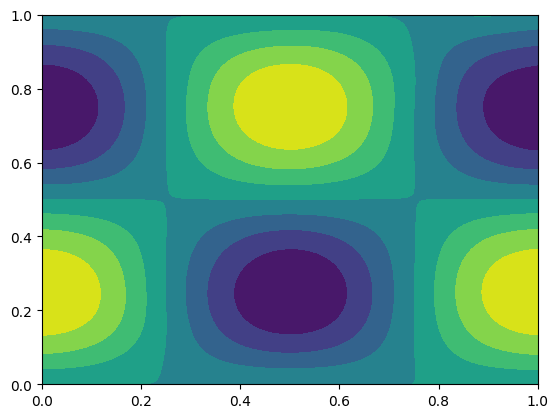

In [91]:
xx, yy = np.meshgrid(x, y)


eval_exact=[u_exact(x[i],1) for i in range(len(x))]

eval_net=[vp.u_NN(x[i],1).numpy()[0,0] for i in range(len(x))]

eval_exact=np.array(eval_exact)
eval_net=np.array(eval_net)

plt.contourf(xx, yy, z_pred)
plt.show()

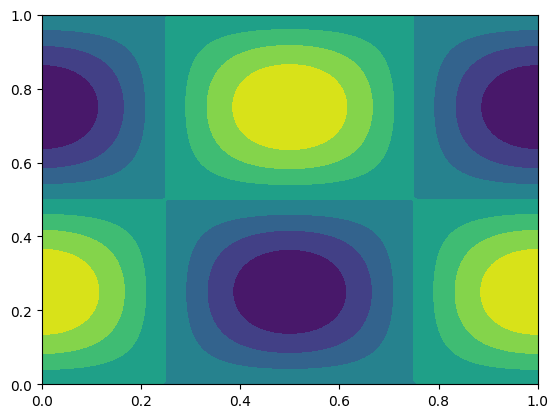

In [ ]:

plt.contourf(xx, yy, u_exact(xx,yy))
plt.show()

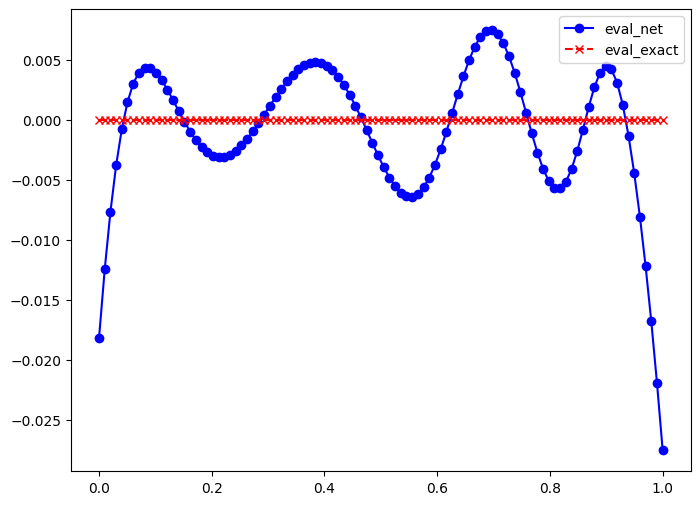

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the data
plt.plot(x, eval_net, label='eval_net', linestyle='-', marker='o', color='b')
plt.plot(x, eval_exact, label='eval_exact', linestyle='--', marker='x', color='r')
plt.legend()



In [ ]:

indices = tf.constant([[[triangle[0],1]], [[triangle[1],1]], [[triangle[2],1]]])


In [ ]:
print(vp.NN.trainable_variables)

[<tf.Variable 'dense/kernel:0' shape=(2, 10) dtype=float64, numpy=
array([[-0.29844066, -0.27304573,  0.6799325 ,  0.79441511, -0.24538281,
        -0.77355322,  0.19968503, -0.68566698, -0.4936881 ,  0.51978981],
       [ 0.81758482,  0.63578331,  0.05872474, -0.11983312,  0.87380719,
        -0.16276562,  0.89138212,  0.83274895,  0.55657379, -0.52146408]])>, <tf.Variable 'dense/bias:0' shape=(10,) dtype=float64, numpy=
array([-0.31407386, -0.53923515, -0.32946436, -0.36954349,  0.54686446,
       -0.04885715,  0.03518215, -0.16590555, -0.04043261,  0.11951854])>, <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float64, numpy=
array([[ 0.39010505, -0.82578015, -0.06860218, -0.15473437, -0.56714939,
        -0.77125346, -0.55354256,  0.43951739, -0.61013334, -0.16206326],
       [ 0.68535693,  0.28325878,  0.29396856, -0.5700341 , -0.26894024,
        -0.71114755,  0.50905445, -0.15191563, -0.84150637,  0.42018025],
       [-0.61908971, -0.60635573,  0.20416038, -0.34958836,  1.0

In [ ]:
tensor = tf.constant([[1, 1,1, 1]])    # tf.rank(tensor) == 2
indices = [[0,0]]           # num_updates == 2, index_depth == 2
updates = [5]                    # num_updates == 2
print(tf.tensor_scatter_nd_update(tensor, indices, updates))

print(vp.F_total_edges)


tf.Tensor([[5 1 1 1]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[-2.54628418e+00]
 [ 2.54628418e+00]
 [ 1.16775457e-04]
 [-2.54628418e+00]
 [ 1.52655666e-16]
 [ 2.54626331e+00]
 [ 2.54616741e+00]
 [ 0.00000000e+00]
 [-2.54626331e+00]
 [ 0.00000000e+00]
 [-2.54616465e+00]
 [-5.09254749e+00]
 [-2.54626331e+00]
 [-2.54628418e+00]
 [ 0.00000000e+00]
 [ 2.54616465e+00]
 [-2.54616741e+00]
 [ 0.00000000e+00]
 [ 2.54626331e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.54626606e+00]
 [ 5.09256837e+00]
 [ 2.54626606e+00]
 [ 2.54616465e+00]
 [ 0.00000000e+00]
 [ 2.54626606e+00]
 [ 0.00000000e+00]], shape=(28, 1), dtype=float64)


In [ ]:
vp.boundary_points

<tf.Tensor: shape=(320, 2), dtype=float64, numpy=
array([[0.    , 0.    ],
       [0.0125, 0.    ],
       [0.025 , 0.    ],
       [0.0375, 0.    ],
       [0.05  , 0.    ],
       [0.0625, 0.    ],
       [0.075 , 0.    ],
       [0.0875, 0.    ],
       [0.1   , 0.    ],
       [0.1125, 0.    ],
       [0.125 , 0.    ],
       [0.1375, 0.    ],
       [0.15  , 0.    ],
       [0.1625, 0.    ],
       [0.175 , 0.    ],
       [0.1875, 0.    ],
       [0.2   , 0.    ],
       [0.2125, 0.    ],
       [0.225 , 0.    ],
       [0.2375, 0.    ],
       [0.25  , 0.    ],
       [0.2625, 0.    ],
       [0.275 , 0.    ],
       [0.2875, 0.    ],
       [0.3   , 0.    ],
       [0.3125, 0.    ],
       [0.325 , 0.    ],
       [0.3375, 0.    ],
       [0.35  , 0.    ],
       [0.3625, 0.    ],
       [0.375 , 0.    ],
       [0.3875, 0.    ],
       [0.4   , 0.    ],
       [0.4125, 0.    ],
       [0.425 , 0.    ],
       [0.4375, 0.    ],
       [0.45  , 0.    ],
       [0.4625, 0.    ],


In [ ]:
a=tf.constant([1.0 ,2.0])


print(a)



tf.Tensor([1. 2.], shape=(2,), dtype=float32)


In [ ]:
b=tf.Variable([1.0 ,2.0])

print(b)

b[0].assign(6.0)

print(b)


<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([6., 2.], dtype=float32)>


In [ ]:
x=tf.constant(6.0)

def f(x):
    return x*x


with tf.GradientTape() as tape:
    tape.watch(x)
    res=f(x)
grad=tape.gradient(res,x)


print(res,grad,12)


tf.Tensor(36.0, shape=(), dtype=float32) tf.Tensor(12.0, shape=(), dtype=float32) 12


In [ ]:
x=tf.Variable(3.0)
y=tf.Variable(1.0)

def f(x):
    return np.sin(x)



with tf.GradientTape(persistent=True) as tape:
    #y.assign_add(x)
    z=x+y
    res=f(z)        #(x+y)^2
    temp=np.array(res)

grad=tape.gradient(res,x)  
#grad_=tape.gradient(temp,x)


print(res,grad)
print(grad_)

AttributeError: 'numpy.float32' object has no attribute '_id'

In [ ]:
x=.constant(3.0)
def f(x):
    return x*x



with tf.GradientTape() as tape:
    #y.assign_add(x)
    tape.watch(x)
    res=f(x)


grad=tape.gradient(res,x)   


print(res,grad)

ValueError: Passed in object 3.0 of type 'ndarray', not tf.Tensor or tf.Variable or ExtensionType.

In [ ]:
x=tf.constant((1,2))

print(x)

x[0]=1

tf.Tensor([1 2], shape=(2,), dtype=int32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [ ]:
import tensorflow as tf

# Define the shape of the row vector
vector_length = 10

# Specify the indices where you want to place non-zero values
non_zero_indices = tf.constant([[2], [5], [8]], dtype=tf.int32)

# Specify the values to be placed at the specified indices
non_zero_values = tf.constant([[1.0], [2.0], [3.0]], dtype=tf.float32)

# Create the row vector with zeros and the specified values
row_vector = tf.scatter_nd(non_zero_indices, non_zero_values, shape=(vector_length,1))

# Print the result
print(row_vector.numpy())


print(row_vector[1][0])




[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [3.]
 [0.]]
tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
x=tf.Variable(tf.zeros((1,2),dtype=tf.float64))
print(x)

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float64, numpy=array([[0., 0.]])>
